In [1]:
import pandas as pd
import numpy as np

In [2]:
trn=pd.read_csv('train_data.txt',sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"])

C:\Users\Harshal\AppData\Local\Temp\ipykernel_10996\463900666.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trn=pd.read_csv('train_data.txt',sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"])


In [3]:
trn.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
tst=pd.read_csv('test_data.txt',sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"])

C:\Users\Harshal\AppData\Local\Temp\ipykernel_10996\3887242270.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tst=pd.read_csv('test_data.txt',sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"])


In [5]:
tst.head()

,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
trn.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [7]:
tst.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [8]:
import seaborn as sns

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

<Axes: xlabel='count', ylabel='GENRE'>

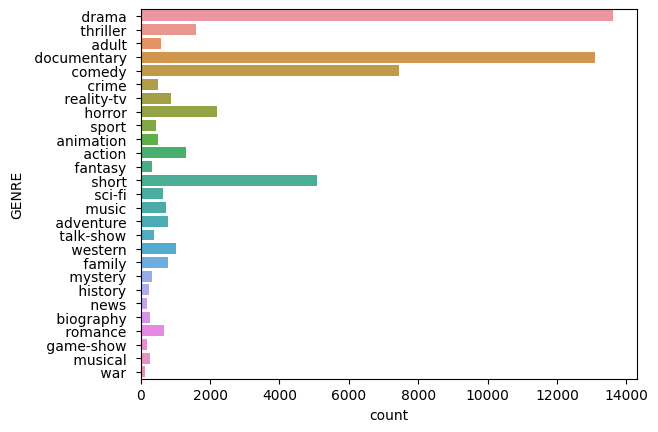

In [9]:
sns.countplot(data=trn,y=trn['GENRE'])

In [10]:
from nltk.stem import LancasterStemmer #to clean unwanted side data

In [11]:
pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Harshal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import re
import string

# Download the stopwords and punkt resources
nltk.download('stopwords')
nltk.download('punkt')

# Create an instance of the LancasterStemmer
stemmer = LancasterStemmer()

# Create a set of English stopwords
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Assuming train_data, trn, test_data, and tst are defined elsewhere in your code
trn["TextCleaning"] = trn["DESCRIPTION"].apply(cleaning_data)
tst["TextCleaning"] = tst["DESCRIPTION"].apply(cleaning_data)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harshal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harshal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
trn.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [14]:
tst.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [34]:
trn1=trn.head(10000)
tst1=tst.head(10000)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(trn1["TextCleaning"])

X_test = vectorize.transform(tst1["TextCleaning"])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=X_train
y=trn1['GENRE']

In [38]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [39]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, Y_train)

SVC()

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score 

In [48]:
acc=accuracy_score(y_pred,Y_test)

In [51]:
print(acc)

0.4655


In [52]:
y_pred

array([' documentary ', ' drama ', ' drama ', ..., ' drama ', ' drama ',
       ' drama '], dtype=object)